# Exploratory Data Analysis

**Categorical Features - Transaction**

* ProductCD
* card1 - card6
* addr1, addr2
* P_emaildomain
* R_emaildomain
* M1 - M9

**Categorical Features - Identity**

* DeviceType
* DeviceInfo
* id_12 - id_38


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Importing dataset

### Merging dataset into train and test feather files

In [2]:
def combine_data(path: str):
    csv_path = os.path.join(path, 'train_transaction.csv')
    df_train_transaction = pd.read_csv(csv_path)

    csv_path = os.path.join(path, 'train_identity.csv')
    df_train_identity = pd.read_csv(csv_path)

    csv_path = os.path.join(path, 'test_transaction.csv')
    df_test_transaction = pd.read_csv(csv_path)

    csv_path = os.path.join(path, 'test_identity.csv')
    df_test_identity = pd.read_csv(csv_path)

    # the id columns in the test df are named with hyphen and in train df are named with underscore
    id_cols = [col for col in df_test_identity.columns if col[:2] == 'id']
    dict_cols = {i:'id_'+str(i[-2]+i[-1]) for i in id_cols}

    df_test_identity.rename(columns=dict_cols, inplace=True)

    if list(df_train_transaction.columns.drop('isFraud')) != list(df_test_transaction.columns):
        print("Transaction columns differ between training and test data")

    if list(df_train_identity.columns) != list(df_test_identity.columns):
        for i in range(len(list(df_train_identity.columns))):
            if list(df_train_identity.columns)[i] != list(df_test_identity.columns)[i]:
                print(list(df_train_identity.columns)[i] + "  " + list(df_test_identity.columns)[i])
        print("Identity columns differ between training and test data")
    
    df_test = df_test_transaction.merge(df_test_identity, on=['TransactionID'], how='left')
    df_train = df_train_transaction.merge(df_train_identity, on=['TransactionID'], how='left')

    print(df_test.shape)
    print(df_train.shape)

    df_test.to_feather(os.path.join(path, 'test_combined.feather'))
    df_train.to_feather(os.path.join(path, 'train_combined.feather'))

In [3]:
combine_data('../data')

(506691, 433)
(590540, 434)


### Importing data from combined feather files

In [4]:
def read_data(path: str) -> pd.DataFrame:
    df_train = pd.read_feather(os.path.join(path, 'train_combined.feather'))
    df_test = pd.read_feather(os.path.join(path, 'test_combined.feather'))

    return df_train, df_test

In [5]:
df_train, df_test = read_data('../data')

df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 506691 entries, 0 to 506690
Columns: 433 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(3), object(31)
memory usage: 1.6+ GB


In [6]:
df_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,None,NaN,None,None,None,None,None,None,None,None
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,None,NaN,None,None,None,None,None,None,None,None
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,None,NaN,None,None,None,None,None,None,None,None
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,None,NaN,None,None,None,None,None,None,None,None
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [7]:
df_test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,None,NaN,None,None,None,None,None,None,None,None
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,None,NaN,None,None,None,None,None,None,None,None
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,None,NaN,None,None,None,None,None,None,None,None
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,None,NaN,None,None,None,None,None,None,None,None
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,None,NaN,None,None,None,None,None,None,None,None


In [8]:
df_train.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
id_36              object
id_37              object
id_38              object
DeviceType         object
DeviceInfo         object
Length: 434, dtype: object

In [9]:
df_train = df_train.astype({'isFraud': bool}, errors='raise')
df_train.dtypes

TransactionID       int64
isFraud              bool
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
id_36              object
id_37              object
id_38              object
DeviceType         object
DeviceInfo         object
Length: 434, dtype: object

In [10]:
df_test.dtypes

TransactionID       int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
card1               int64
                   ...   
id_36              object
id_37              object
id_38              object
DeviceType         object
DeviceInfo         object
Length: 433, dtype: object

## Exploring data

### Is Fraud distribution in training set

In [11]:
df_train['isFraud'].value_counts()

False    569877
True      20663
Name: isFraud, dtype: int64

<AxesSubplot:xlabel='isFraud', ylabel='count'>

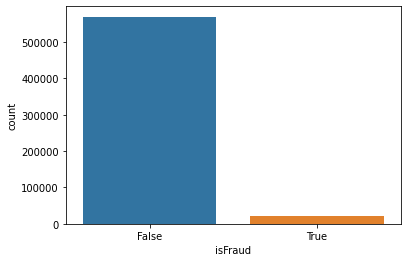

In [12]:
sns.countplot(data=df_train, x='isFraud')

In [13]:
total = float(df_train['isFraud'].shape[0])
normal = df_train['isFraud'].value_counts()[False]
fraudulent = df_train['isFraud'].value_counts()[True]

print('Percentage of fraudulent transactions {:1.2f}%'.format(fraudulent / total * 100))
print('Percentage of normal transactions {:1.2f}%'.format(normal / total * 100))

Percentage of fraudulent transactions 3.50%
Percentage of normal transactions 96.50%


There are a lot more normal transactions than fraudulent transactions. This is to be expected.

### Finding top missing columns and possibly correlation between them and fraudulent transactions

In [14]:
def top_missing_cols(df: pd.DataFrame, thersh: int=80) -> list:
    dff = (df.isnull().sum() / df.shape[0]) * 100
    dff.columns = ['col_name', 'missing_percent']
    dff.sort_values(ascending=False, inplace=True)
    dff = dff[dff > thersh]
    return list(dff.keys())

In [15]:
top_missing_cols_name = top_missing_cols(df_train, thersh=90)
print(len(top_missing_cols_name))
print(top_missing_cols_name)

12
['id_24', 'id_25', 'id_07', 'id_08', 'id_21', 'id_26', 'id_27', 'id_23', 'id_22', 'dist2', 'D7', 'id_18']


In [16]:
def top_missing_cols_importance(df: pd.DataFrame, cols: list):
    mask = df[cols].any(axis='columns')
    dff = df[mask.values]
    dff = dff[cols + ['isFraud']]

    dff_value_counts = dff['isFraud'].value_counts()
    df_value_counts = df['isFraud'].value_counts()

    print(df_value_counts)

    sns.countplot(data=dff, x='isFraud').set(title='All')
    plt.show()

    for col in cols:
        mask = df[col].notnull()
        dff = df[mask.values]
        dff = dff[[col, 'isFraud']]
        sns.countplot(data=dff, x='isFraud').set(title=col)
        plt.show()

        # check if dtype is numeric to plot the distribution
        if pd.api.types.is_numeric_dtype(dff[col].dtype):
            dff_fraud = dff[dff['isFraud'] == True]
            dff_not_fraud = dff[dff['isFraud'] == False]
            # sns.displot(dff_fraud, x=col, label='fraud', kind='kde')
            # sns.displot(dff_not_fraud, x=col, label='not fraud', kind='kde')

            sns.displot(dff, x=col, hue='isFraud', kde=True)
            plt.show()


False    569877
True      20663
Name: isFraud, dtype: int64


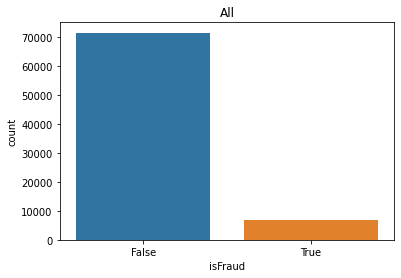

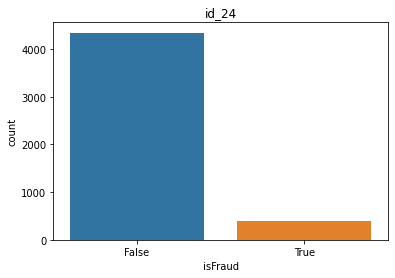

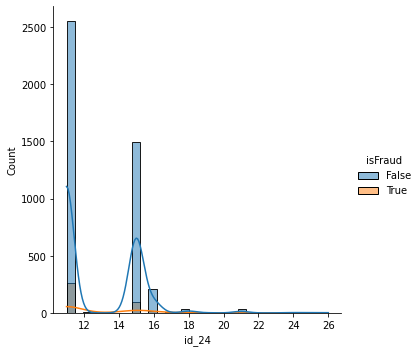

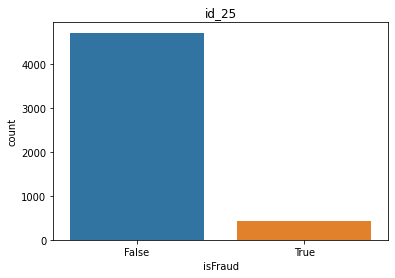

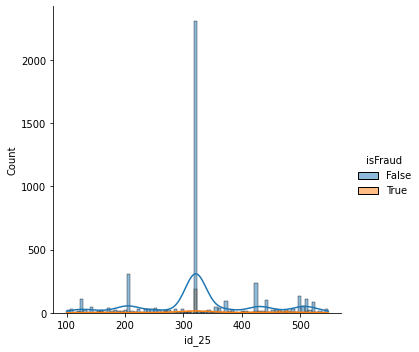

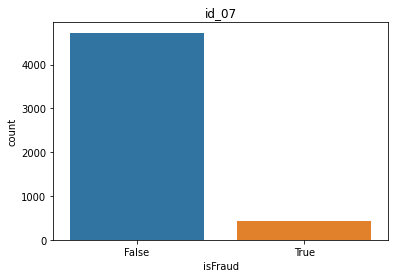

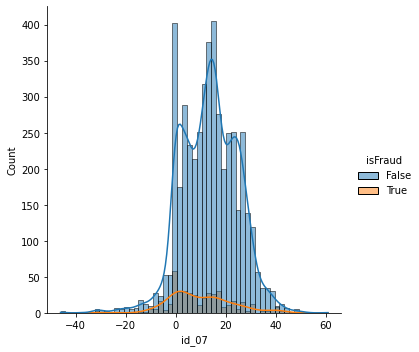

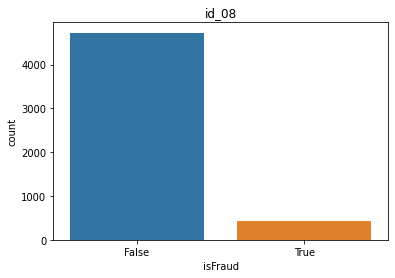

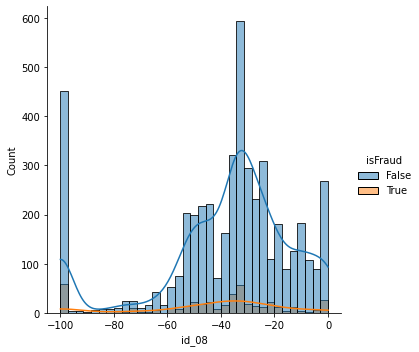

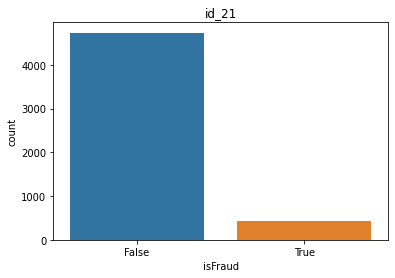

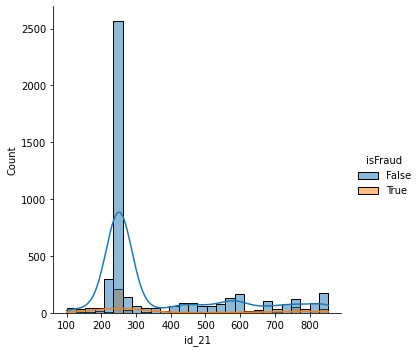

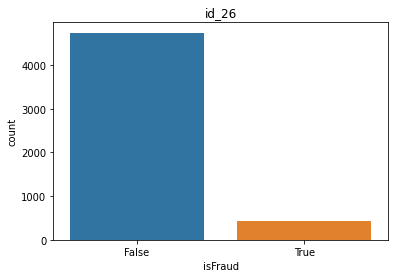

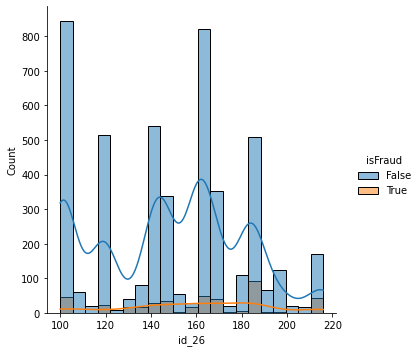

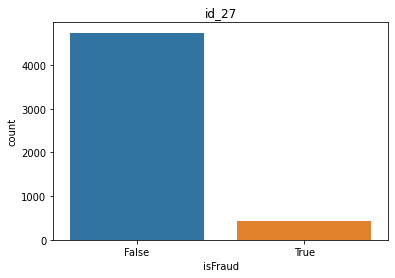

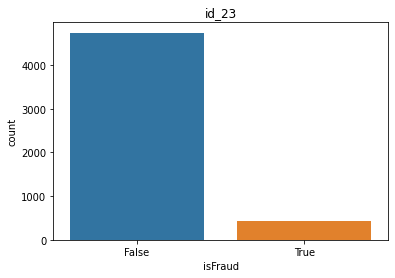

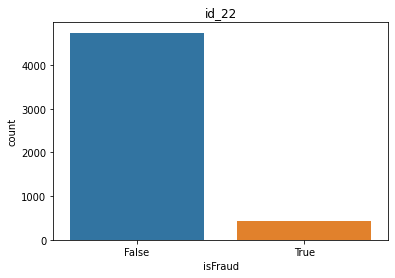

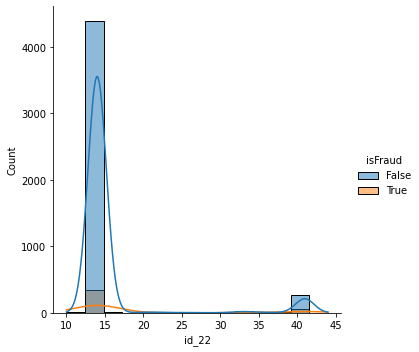

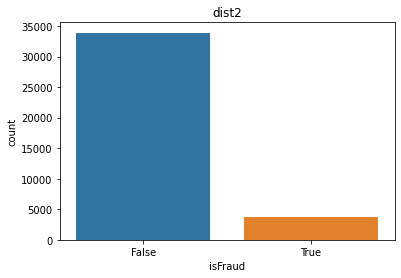

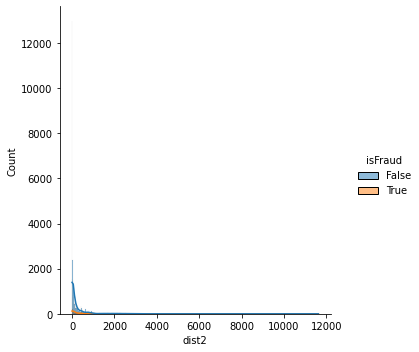

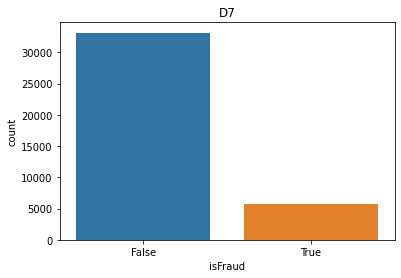

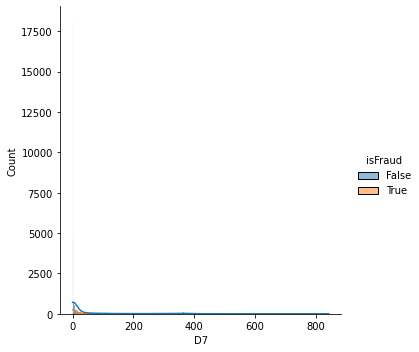

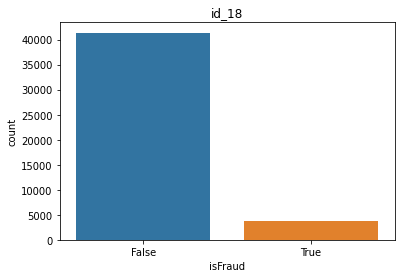

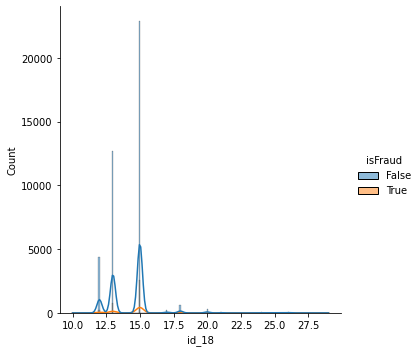

In [17]:
top_missing_cols_importance(df_train, top_missing_cols_name)

The distribution of fraudulent and non fraudulent transactions between top missing columns is very similar. There is no evident correlation between this columns and fraudulent transactions so we should drop them before we train our models

### TransactionDT

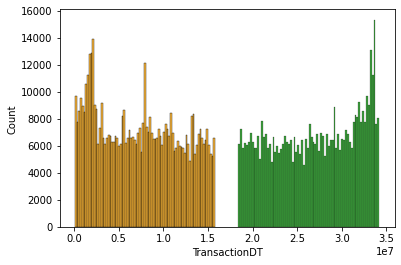

In [18]:
sns.histplot(df_train['TransactionDT'], color='orange')
sns.histplot(df_test['TransactionDT'], color='green')
plt.show()

Transactions in test data are all after transactions in train data. We could take into account this when splitting the train data into train and test subsets

In [19]:
def day_of_week_distribution(df: pd.DataFrame):
    dff = df.copy()
    dff = dff[['TransactionDT', 'isFraud']]
    dff['day_of_week'] = (df_train['TransactionDT']//(60*60*24)-1)%7
    tmp_fraud = dff[['isFraud', 'day_of_week']].groupby(by=['day_of_week']).sum().reset_index().rename(columns={'isFraud': 'cnt_fraud'})
    tmp = dff[['isFraud', 'day_of_week']].groupby(by=['day_of_week']).count().reset_index().rename(columns={'isFraud': 'cnt'})
    
    sns.barplot(x=tmp_fraud['day_of_week'], y=tmp_fraud['cnt_fraud'], palette='pastel')
    # sns.barplot(x=tmp['day_of_week'], y=tmp['cnt'], color='b')
    plt.show()
    
    sns.displot(dff, x='day_of_week', hue='isFraud', multiple='stack')
    plt.show()

    tmp = tmp.merge(tmp_fraud, on=['day_of_week'])
    tmp['percentage_fraud'] = tmp_fraud['cnt_fraud'] / tmp['cnt'] * 100
    sns.lineplot(data=tmp, x='day_of_week', y='percentage_fraud')
    plt.show()

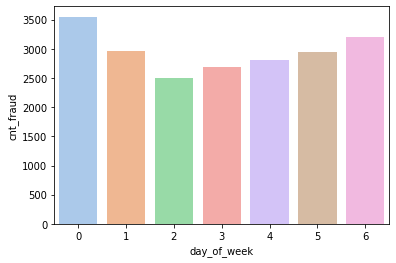

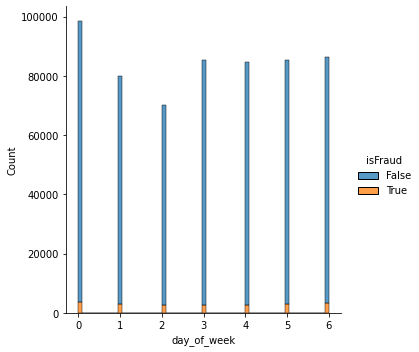

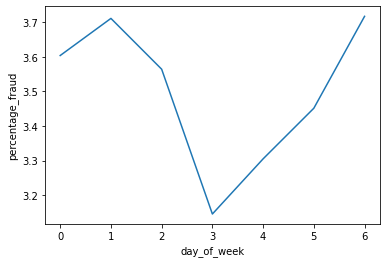

In [20]:
day_of_week_distribution(df_train)

In [21]:
def hour_of_day_distribution(df: pd.DataFrame):
    dff = df.copy()
    dff = dff[['TransactionDT', 'isFraud']]
    dff['hour_of_day'] = (df_train['TransactionDT']//(60*60))%24
    tmp_fraud = dff[['isFraud', 'hour_of_day']].groupby(by=['hour_of_day']).sum().reset_index().rename(columns={'isFraud': 'cnt_fraud'})
    tmp = dff[['isFraud', 'hour_of_day']].groupby(by=['hour_of_day']).count().reset_index().rename(columns={'isFraud': 'cnt'})
    
    sns.barplot(x=tmp_fraud['hour_of_day'], y=tmp_fraud['cnt_fraud'], palette='pastel')
    # sns.barplot(x=tmp['hour_of_day'], y=tmp['cnt'], color='b')
    plt.show()
    
    sns.displot(dff, x='hour_of_day', hue='isFraud', multiple='stack')
    plt.show()

    tmp = tmp.merge(tmp_fraud, on=['hour_of_day'])
    tmp['percentage_fraud'] = tmp_fraud['cnt_fraud'] / tmp['cnt'] * 100
    sns.lineplot(data=tmp, x='hour_of_day', y='percentage_fraud')
    plt.show()

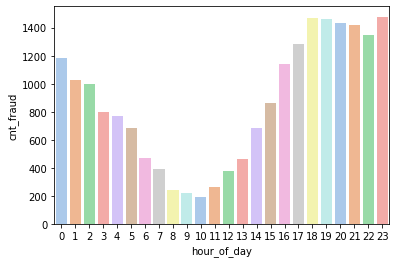

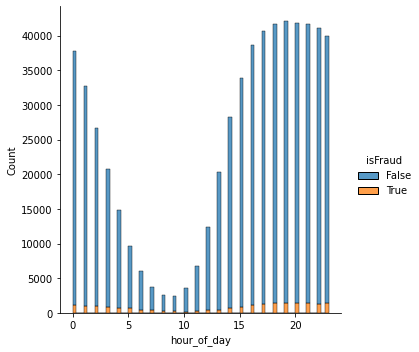

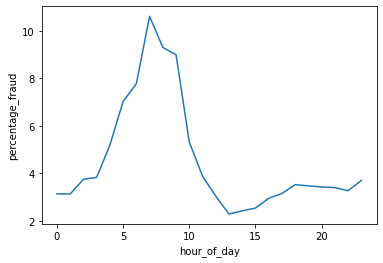

In [22]:
hour_of_day_distribution(df_train)

### TransactionAmt

In [23]:
def transaction_amount_hour_distribution(df: pd.DataFrame):
    dff = df.copy()
    dff = dff[['TransactionDT', 'TransactionAmt', 'isFraud']]
    dff['hour_of_day'] = (df_train['TransactionDT']//(60*60))%24
    tmp = dff[['isFraud', 'TransactionAmt', 'hour_of_day']].groupby(by=['hour_of_day'], as_index=False).agg(
        TransactionAmt = ('TransactionAmt', 'sum'),
        cnt_fraud = ('isFraud', 'sum'),
        cnt_transactions = ('isFraud', 'count')
    )
    
    tmp['percentage_fraud'] = tmp['cnt_fraud'] / tmp['cnt_transactions'] * 100

    sns.barplot(x=tmp['hour_of_day'], y=tmp['cnt_fraud'], palette='pastel')
    plt.show()
    sns.lineplot(data=tmp, x='hour_of_day', y='percentage_fraud')
    plt.show()

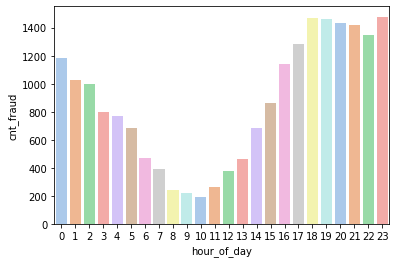

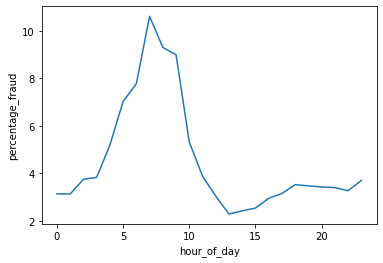

In [24]:
transaction_amount_hour_distribution(df_train)

In [36]:
def transaction_amount_day_distribution(df: pd.DataFrame):
    dff = df.copy()
    dff = dff[['TransactionDT', 'TransactionAmt', 'isFraud']]
    dff['day_of_week'] = (df_train['TransactionDT']//(60*60*24)-1)%7
    tmp = dff[['isFraud', 'TransactionAmt', 'day_of_week']].groupby(by=['day_of_week'], as_index=False).agg(
        TransactionAmt = ('TransactionAmt', 'sum'),
        cnt_fraud = ('isFraud', 'sum'),
        cnt_transactions = ('isFraud', 'count')
    )
    
    tmp['percentage_fraud'] = tmp['cnt_fraud'] / tmp['cnt_transactions'] * 100

    sns.barplot(x=tmp['day_of_week'], y=tmp['cnt_fraud'], palette='pastel')
    plt.show()
    sns.lineplot(data=tmp, x='day_of_week', y='percentage_fraud')
    plt.show()

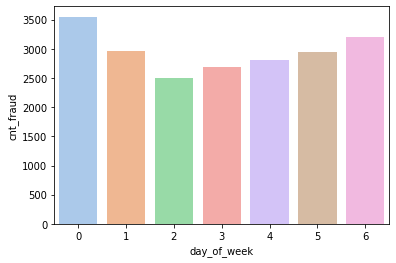

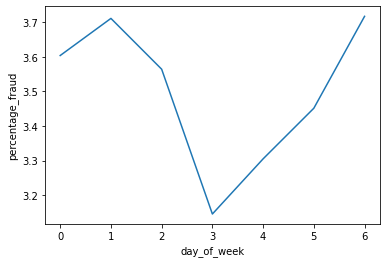

In [37]:
transaction_amount_day_distribution(df_train)

In [34]:
def transaction_amount_distribution(df: pd.DataFrame):
    dff = df.copy()
    dff = dff[['TransactionDT', 'TransactionAmt', 'isFraud']]
    
    sns.scatterplot(x=dff['TransactionDT'], y=dff['TransactionAmt'], hue=dff['isFraud'])
    plt.show()

    dff['TransactionAmt'] = np.log(dff['TransactionAmt'])

    sns.displot(dff[['TransactionAmt', 'isFraud']], x='TransactionAmt', hue='isFraud', kind='kde')
    plt.show()

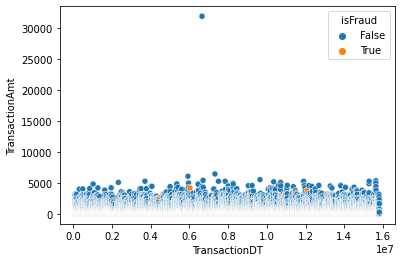

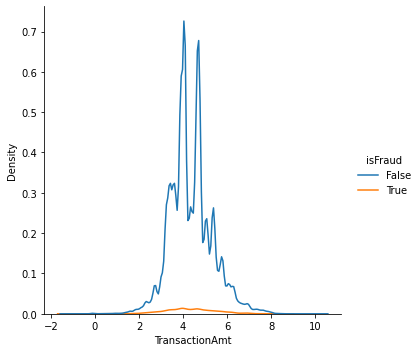

In [35]:
transaction_amount_distribution(df_train)

There is an outlier above 30000 that should be removed

### ProductCD

In [39]:
df_train['ProductCD'].isnull().sum()

0

In [40]:
df_train['ProductCD'].value_counts()

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64

In [48]:
def product_cd_distribution(df: pd.DataFrame):
    sns.countplot(data=df, x='ProductCD', hue='isFraud')
    plt.show()



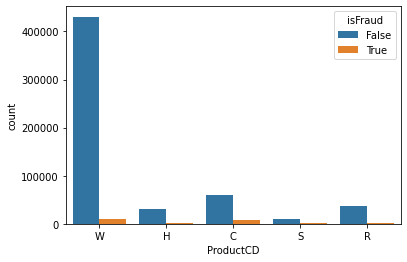

In [49]:
product_cd_distribution(df_train)

### Card 1-6

Card columns have information details about the card

In [61]:
def cards_distribution(df: pd.DataFrame):
    cards = [col for col in df.columns if 'card' in col]

    for card in cards:
        if pd.api.types.is_numeric_dtype(df[card].dtype):
            sns.histplot(data=df, x=card, hue='isFraud', multiple='stack')
            plt.show()
        else:
            sns.countplot(data=df, x=card, hue='isFraud')
            plt.show()

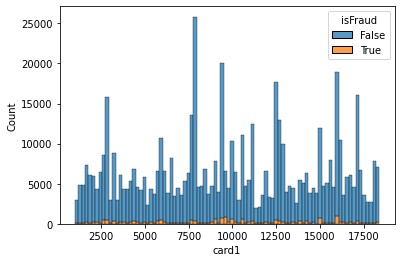

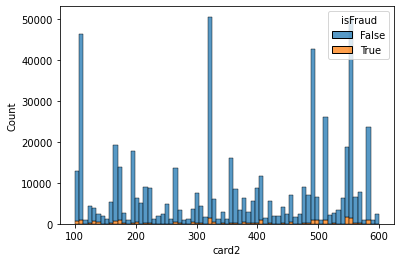

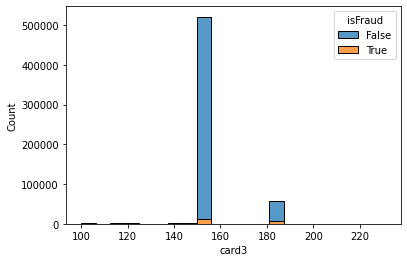

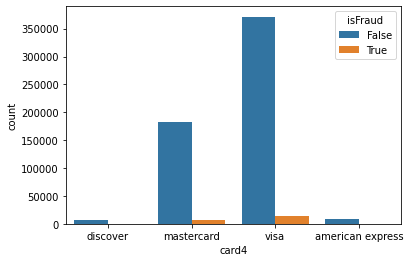

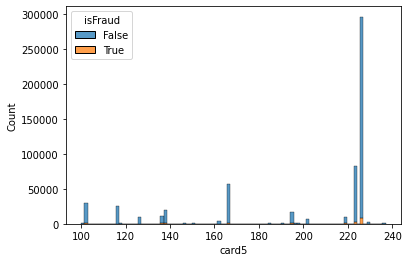

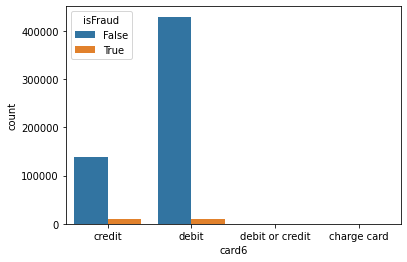

In [62]:
cards_distribution(df_train)

In [71]:
def cards_correlation(df: pd.DataFrame):
    cards = [col for col in df.columns if 'card' in col]
    cards.append('isFraud')
    print(df[cards].corr())
    sns.heatmap(df[cards].corr(), vmin=-1, vmax=1)

            card1     card2     card3     card5   isFraud
card1    1.000000  0.004960  0.002965 -0.093633 -0.013640
card2    0.004960  1.000000  0.023816  0.030486  0.003388
card3    0.002965  0.023816  1.000000 -0.158383  0.154151
card5   -0.093633  0.030486 -0.158383  1.000000 -0.033580
isFraud -0.013640  0.003388  0.154151 -0.033580  1.000000


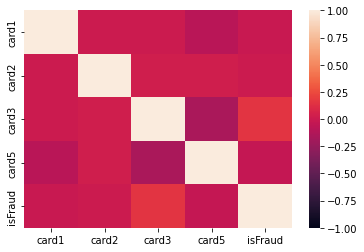

In [72]:
cards_correlation(df_train)

### D1-D15

D columns are some time deltas

In [75]:
import re

def D_distribution(df: pd.DataFrame):
    pattern = 'D\d+'
    cols = [col for col in df.columns if re.match(pattern, col)]

    for col in cols:
        if pd.api.types.is_numeric_dtype(df[col].dtype):
            sns.histplot(data=df, x=col, hue='isFraud', multiple='stack')
            plt.show()
        else:
            sns.countplot(data=df, x=col, hue='isFraud')
            plt.show()

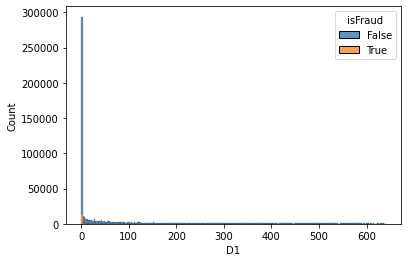

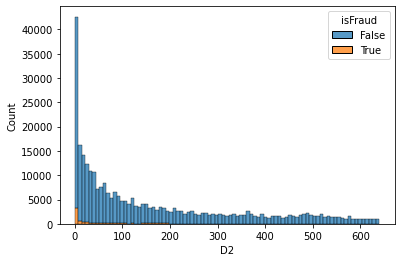

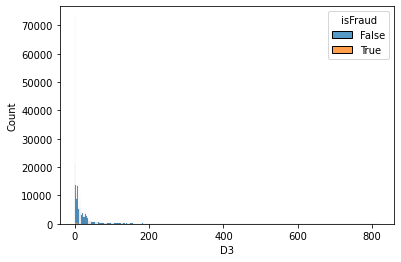

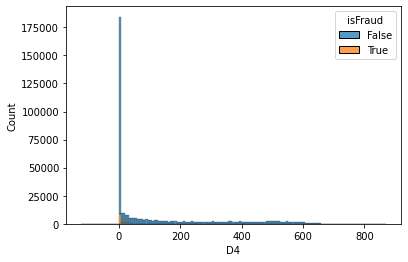

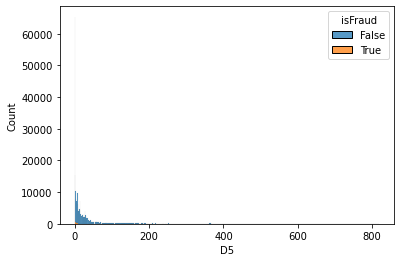

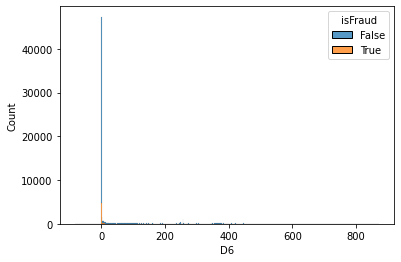

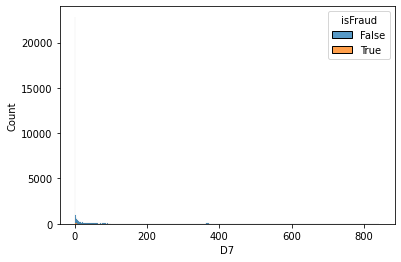

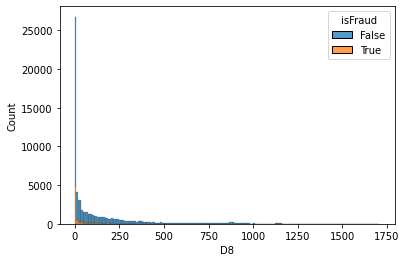

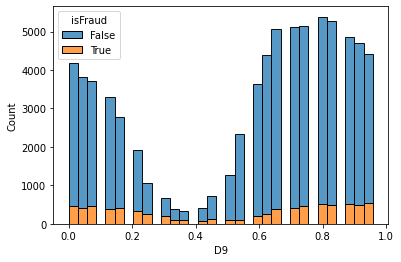

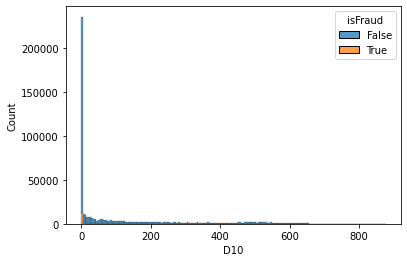

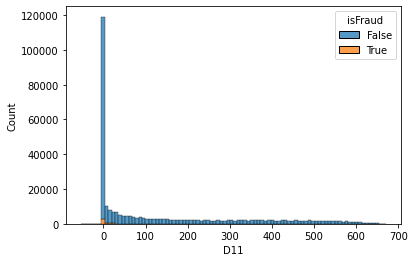

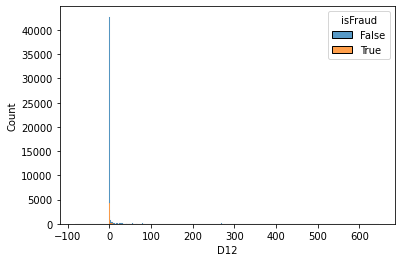

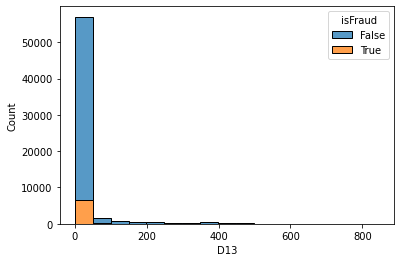

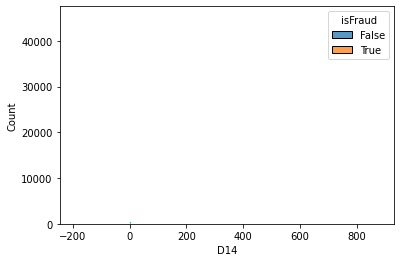

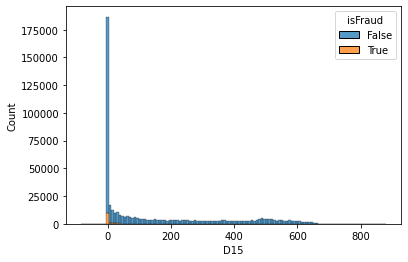

In [76]:
D_distribution(df_train)

### Email domains

In [95]:
def email_domains_distribution(df: pd.DataFrame):
    sns.displot(data=df, y='P_emaildomain', hue='isFraud', multiple='stack', height=15)
    plt.show()

    df[['P_emaildomain', 'isFraud']].groupby(by=['P_emaildomain']).mean().sort_values(by=['isFraud']).plot(kind='barh', figsize=(15, 15), title='Percentage of Fraud')
    plt.show()

    sns.displot(data=df, y='R_emaildomain', hue='isFraud', multiple='stack', height=15)
    plt.show()

    df[['R_emaildomain', 'isFraud']].groupby(by=['R_emaildomain']).mean().sort_values(by=['isFraud']).plot(kind='barh', figsize=(15, 15), title='Percentage of Fraud')
    plt.show()

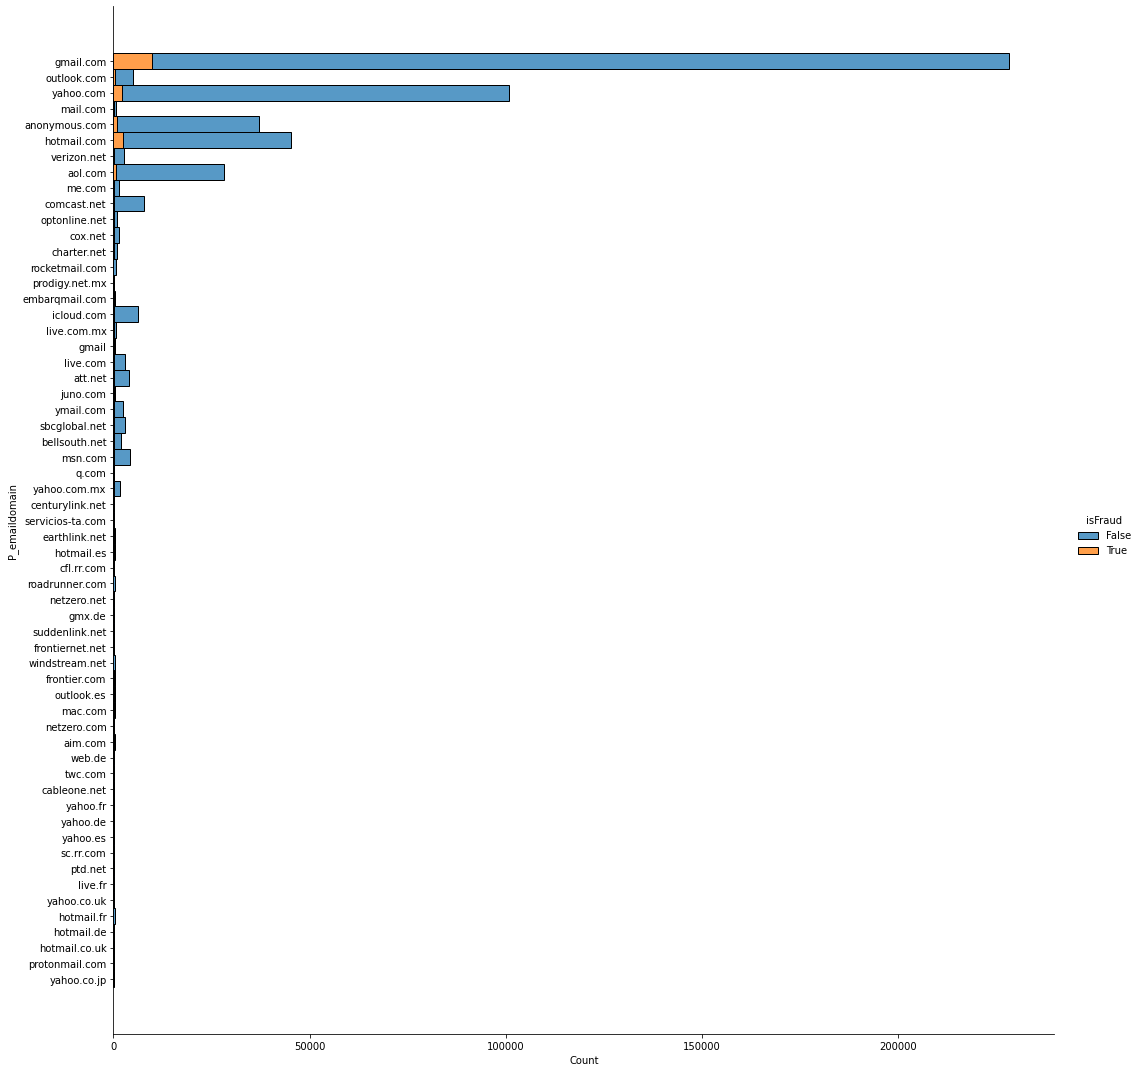

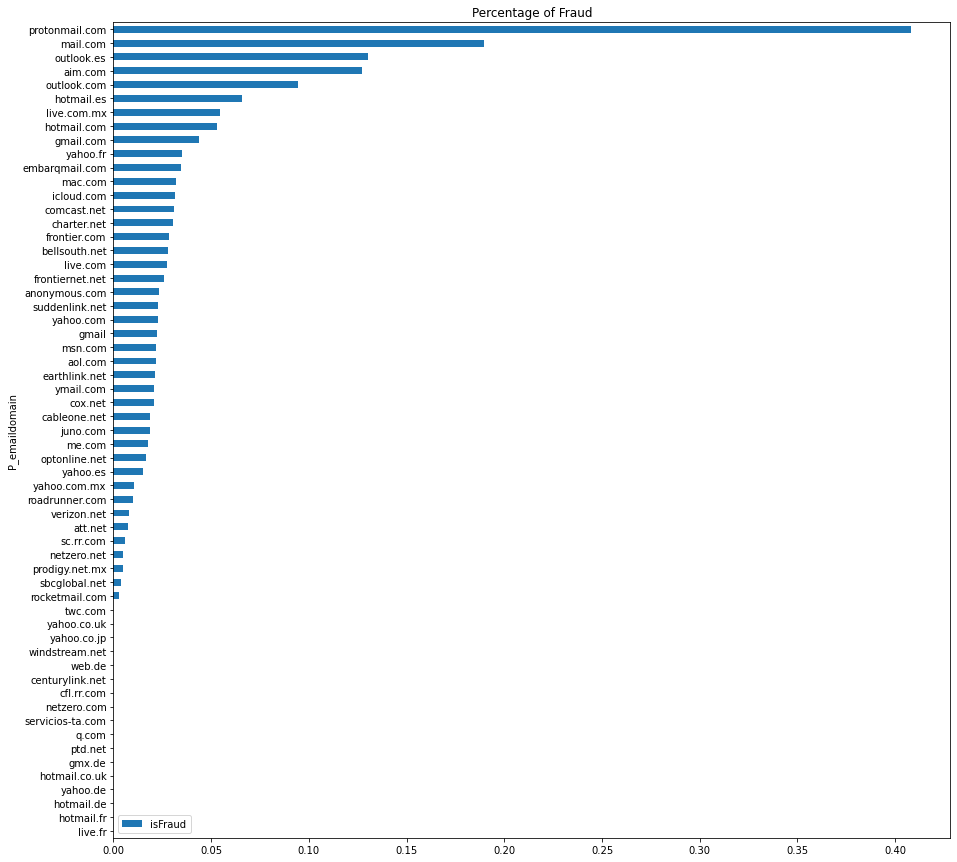

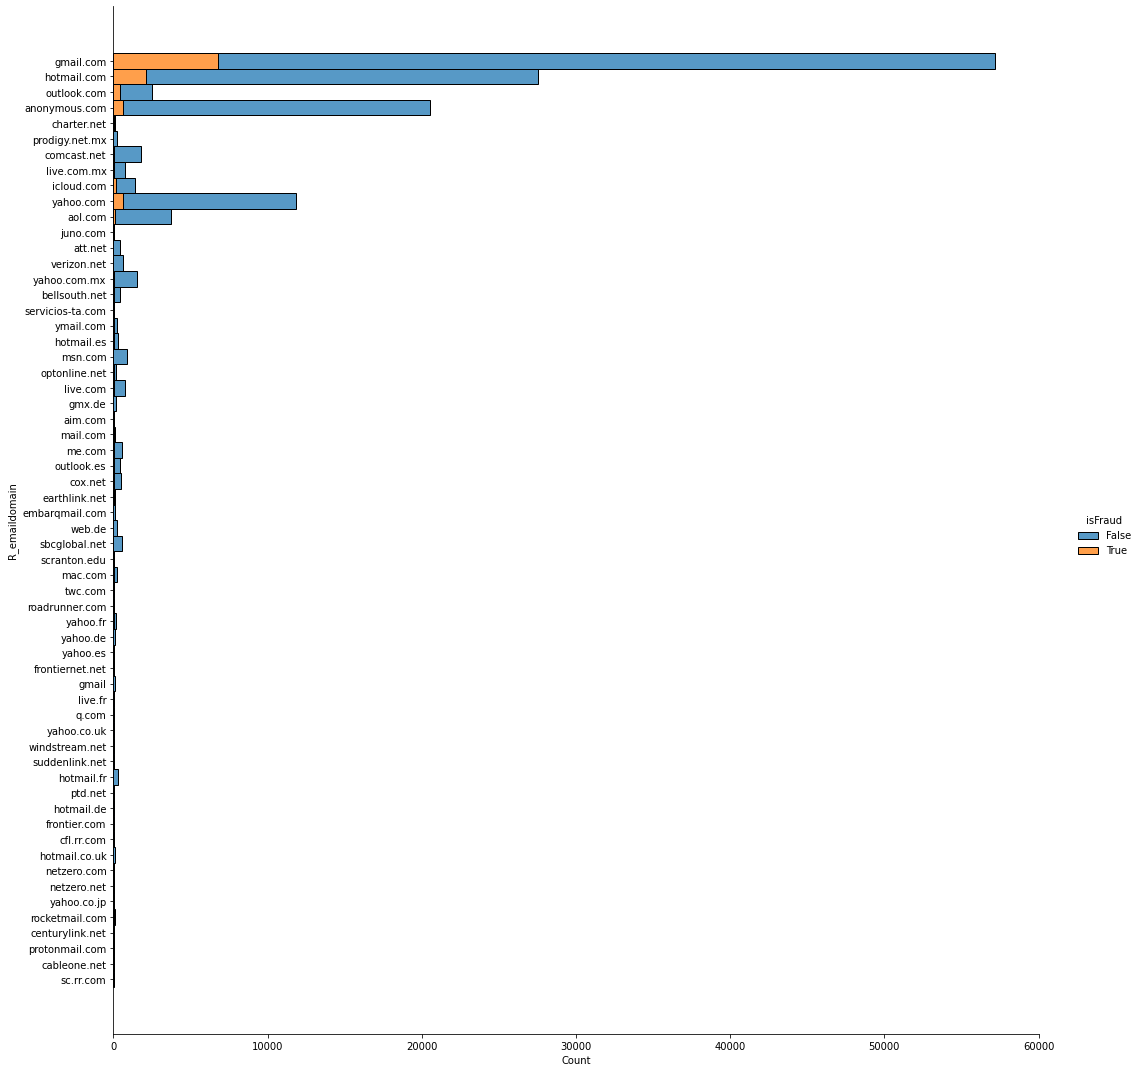

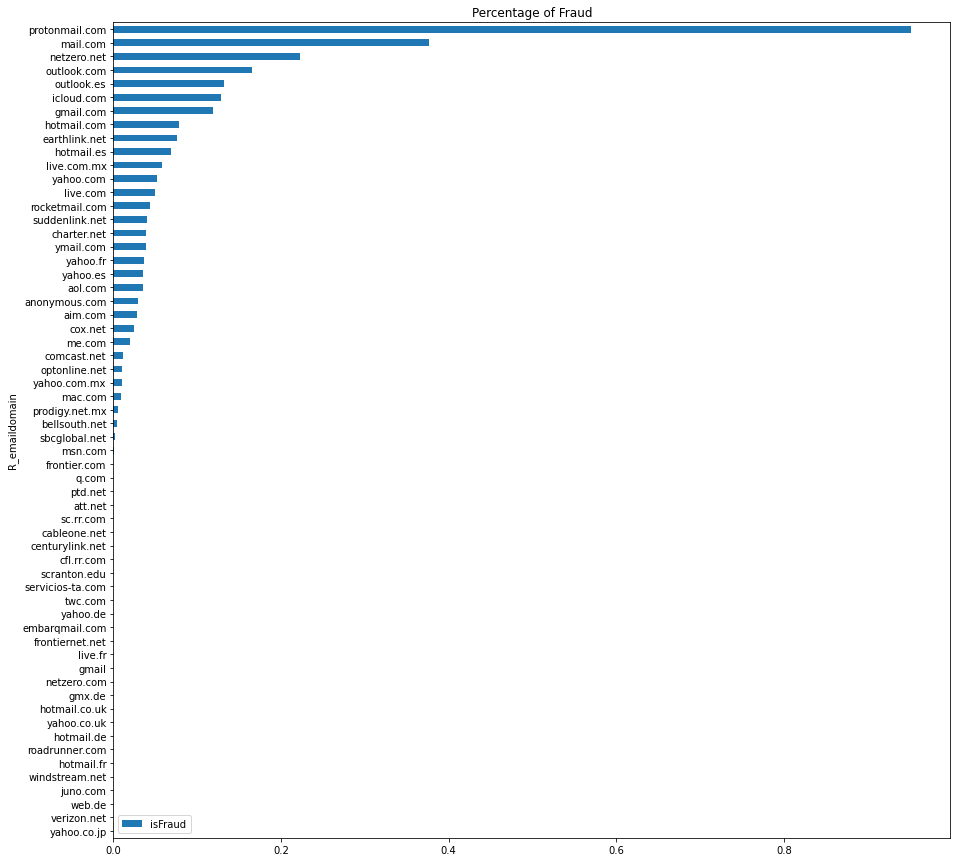

In [96]:
email_domains_distribution(df_train)

If the receiving mail is protonmail.com the probability of it being fraudulent is almost 100%

### Addr1 and Addr2

Address information

In [102]:
df_train['addr1'].isnull().sum() / df_train.shape[0]

0.1112642666034477

In [103]:
df_train['addr2'].isnull().sum() / df_train.shape[0]

0.1112642666034477

In [99]:
def address_distribution(df: pd.DataFrame):
    sns.histplot(df['addr1'])
    plt.show()
    sns.histplot(df['addr2'])
    plt.show()

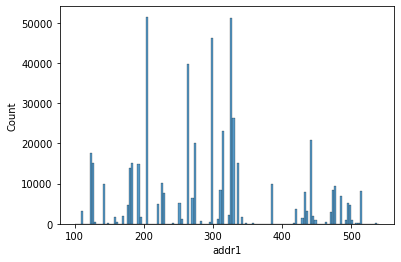

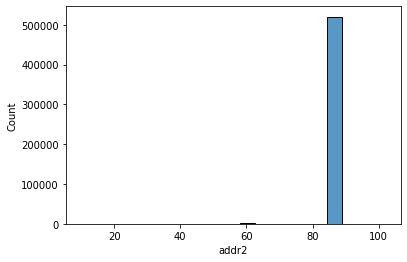

In [100]:
address_distribution(df_train)

### Dist1 and Dist2

Distance between something

In [131]:
df_train['dist1'].isnull().sum() / df_train.shape[0]

0.596523520845328

In [132]:
df_train['dist2'].isnull().sum() / df_train.shape[0]

0.9362837403054831

In [129]:
def distance_distribution(df: pd.DataFrame):
    sns.displot(df, x='dist1', kind='kde')
    plt.show()

    sns.displot(df, x='dist2', kind='kde')
    plt.show()
    

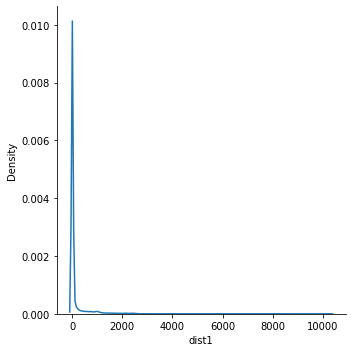

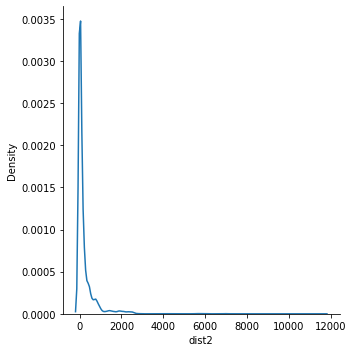

In [130]:
distance_distribution(df_train)

### C1-C14

In [135]:
def C_correlation(df: pd.DataFrame):
    cols = [col for col in df.columns if col[0] == 'C']
    cols.append('isFraud')
    print(df[cols].corr())
    sns.heatmap(df[cols].corr(), vmin=-1, vmax=1)

               C1        C2        C3        C4        C5        C6        C7  \
C1       1.000000  0.995089 -0.003467  0.967800  0.165862  0.982238  0.926258   
C2       0.995089  1.000000 -0.003339  0.972134  0.126540  0.974845  0.938867   
C3      -0.003467 -0.003339  1.000000 -0.001720 -0.008101 -0.004711 -0.001730   
C4       0.967800  0.972134 -0.001720  1.000000 -0.012842  0.962319  0.895092   
C5       0.165862  0.126540 -0.008101 -0.012842  1.000000  0.232409 -0.009970   
C6       0.982238  0.974845 -0.004711  0.962319  0.232409  1.000000  0.858583   
C7       0.926258  0.938867 -0.001730  0.895092 -0.009970  0.858583  1.000000   
C8       0.967746  0.975863 -0.001203  0.959995 -0.011654  0.921972  0.982983   
C9       0.175999  0.133566 -0.010074 -0.015970  0.925786  0.250695 -0.012399   
C10      0.958202  0.970624 -0.001494  0.952466 -0.011846  0.914440  0.985062   
C11      0.996515  0.993898 -0.003583  0.974547  0.168862  0.991105  0.915209   
C12      0.927939  0.940258 

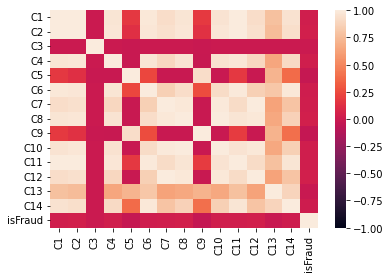

In [136]:
C_correlation(df_train)

There are a lot of corralated features that should be dropped